In [ ]:
# mount google drive to access files on it
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import neccessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
import cv2
import pickle
import warnings
warnings.filterwarnings('ignore')
from google.colab.patches import cv2_imshow

In [ ]:
# store path to all currencies inside of respective variables
keyword= "front"
dir_5= []
for root, dirs, files in os.walk(r"/content/drive/MyDrive/Ogunleye Project/DATASETS/Nigerian Currency dataset/ADEKCURR-DB/5 naira"):
  for file in files:
    if keyword in file:
      dir= os.path.join(root, file)
      dir_5.append(dir)

keyword= "front"
dir_10= []
for root, dirs, files in os.walk(r"/content/drive/MyDrive/Ogunleye Project/DATASETS/Nigerian Currency dataset/ADEKCURR-DB/10 naira"):
  for file in files:
    if keyword in file:
      dir= os.path.join(root, file)
      dir_10.append(dir)

keyword= "front"
dir_20= []
for root, dirs, files in os.walk(r"/content/drive/MyDrive/Ogunleye Project/DATASETS/Nigerian Currency dataset/ADEKCURR-DB/20 naira"):
  for file in files:
    if keyword in file:
      dir= os.path.join(root, file)
      dir_20.append(dir)

keyword= "back"
dir_50= []
for root, dirs, files in os.walk(r"/content/drive/MyDrive/Ogunleye Project/DATASETS/Nigerian Currency dataset/ADEKCURR-DB/50 naira"):
  for file in files:
    if keyword in file:
      dir= os.path.join(root, file)
      dir_50.append(dir)

keyword= "front"
dir_100= []
for root, dirs, files in os.walk(r"/content/drive/MyDrive/Ogunleye Project/DATASETS/Nigerian Currency dataset/ADEKCURR-DB/100 naira"):
  for file in files:
    if keyword in file:
      dir= os.path.join(root, file)
      dir_100.append(dir)

keyword= "front"
dir_200= []
for root, dirs, files in os.walk(r"/content/drive/MyDrive/Ogunleye Project/DATASETS/Nigerian Currency dataset/ADEKCURR-DB/200 naira"):
  for file in files:
    if keyword in file:
      dir= os.path.join(root, file)
      dir_200.append(dir)

keyword= "front"
dir_500= []
for root, dirs, files in os.walk(r"/content/drive/MyDrive/Ogunleye Project/DATASETS/Nigerian Currency dataset/ADEKCURR-DB/500 naira"):
  for file in files:
    if keyword in file:
      dir= os.path.join(root, file)
      dir_500.append(dir)

keyword= "back"
dir_1000= []
for root, dirs, files in os.walk(r"/content/drive/MyDrive/Ogunleye Project/DATASETS/Nigerian Currency dataset/ADEKCURR-DB/1000 naira"):
  for file in files:
    if keyword in file:
      dir= os.path.join(root, file)
      dir_1000.append(dir)

In [ ]:
# reading in data gottten from paths
list_five= []
for dir in dir_5:
  img= cv2.imread(dir, 1)
  list_five.append(img)

list_ten= []
for dir in dir_10:
  img= cv2.imread(dir, 1)
  list_ten.append(img)

list_twenty= []
for dir in dir_20:
  img= cv2.imread(dir, 1)
  list_twenty.append(img)

list_fifty= []
for dir in dir_50:
  img= cv2.imread(dir, 1)
  list_fifty.append(img)

list_hundred= []
for dir in dir_100:
  img= cv2.imread(dir, 1)
  list_hundred.append(img)

list_two_hundred= []
for dir in dir_200:
  img= cv2.imread(dir, 1)
  list_two_hundred.append(img)

list_five_hundred= []
for dir in dir_500:
  img= cv2.imread(dir, 1)
  list_five_hundred.append(img)

list_thousand= []
for dir in dir_1000:
  img= cv2.imread(dir, 1)
  list_thousand.append(img)


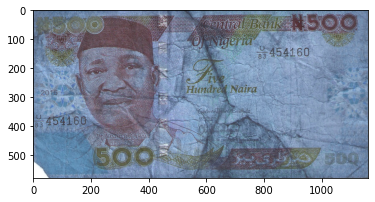

In [ ]:
# visualization of a note in the read in dataset
plt.imshow(list_five_hundred[0])

In [ ]:
# create a list to store all lists with data
store= [list_five, list_ten, list_twenty, list_fifty, list_hundred, list_two_hundred, list_five_hundred, list_thousand]

#pickle.dump(np.asarray(store), open("/content/drive/MyDrive/Ogunleye Project/CODES/pickled files/store.pkl", "wb"))

In [ ]:
print("The number of 5 naira notes are: ", len(store[0]))
print("The number of 10 naira notes are: ", len(store[1]))
print("The number of 20 naira notes are: ", len(store[2]))
print("The number of 50 naira notes are: ", len(store[3]))
print("The number of 100 naira notes are: ", len(store[4]))
print("The number of 200 naira notes are: ", len(store[5]))
print("The number of 500 naira notes are: ", len(store[6]))
print("The number of 1000 naira notes are: ", len(store[7]))

total= 0
for i in store:
  total+= len(i)

print("\n\nThe total number of notes is ", total)

The number of 5 naira notes are:  30
The number of 10 naira notes are:  33
The number of 20 naira notes are:  19
The number of 50 naira notes are:  60
The number of 100 naira notes are:  52
The number of 200 naira notes are:  25
The number of 500 naira notes are:  37
The number of 1000 naira notes are:  29


The total number of notes is  285


In [ ]:
# create target variable that store labels for each of the images
# 0 for 5 naira, 1 for 10 naira and 7 for 1000 naira etc...
y= []
temp= []
for i in range(len(store)):
  j= [i] * len(store[i])
  temp.append(j)

for i in temp:
  for j in i:
    y.append(j)

In [ ]:
# resize images to same size
X= []
IMAGES= []

for i in store:
  for j in i:
    h= cv2.resize(j, dsize=(1100, 550), interpolation= cv2.INTER_LINEAR)
    IMAGES.append(h)
    j= cv2.resize(j, dsize=(128, 128), interpolation= cv2.INTER_LINEAR)
    X.append(j)

In [ ]:
# convert image lists to numpy array for faster and easier computation
X= np.asarray(X)
y= np.asarray(y)
IMAGES= np.asarray(IMAGES)

In [ ]:
"""
pickle.dump(X, open("/content/drive/MyDrive/Ogunleye Project/CODES/pickled files/X.pkl", "wb"))
pickle.dump(y, open("/content/drive/MyDrive/Ogunleye Project/CODES/pickled files/y.pkl", "wb"))
pickle.dump(IMAGES, open("/content/drive/MyDrive/Ogunleye Project/CODES/pickled files/IMAGES.pkl", "wb"))
"""

### Model Training

In [ ]:
"""
X= pickle.load(open("/content/drive/MyDrive/Ogunleye Project/CODES/pickled files/X.pkl", "rb"))
y= pickle.load(open("/content/drive/MyDrive/Ogunleye Project/CODES/pickled files/y.pkl", "rb"))
"""

In [ ]:
#scale the images
X= X/255

In [ ]:
#split data into train and test
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
y= to_categorical(np.array(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((228, 128, 128, 3), (57, 128, 128, 3), (228, 8), (57, 8))

In [ ]:
#import library for deep learning task
import keras
import tensorflow as tf
from tensorflow.keras import layers
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [ ]:
print(len(y))

285


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16 as VGG

base_model= VGG(input_shape= (128, 128, 3), include_top= False, weights= "imagenet")

for each_layer in base_model.layers:
  each_layer.trainable= False

flat= layers.Flatten()(base_model.output)
hidden = layers.Dense(512, activation="relu")(flat)
norm = layers.BatchNormalization(axis = -1)(hidden)
drop = layers.Dropout(rate=0.2)(norm)

out = layers.Dense(8, activation='sigmoid')(drop)

model= tf.keras.models.Model(base_model.input, out)

model.compile(optimizer='adam',
                loss='binary_crossentropy',   
                metrics=['accuracy'])
print(model.summary())


58900480/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                              

In [ ]:
history= model.fit(X_train, y_train,
                   batch_size= 64,
                   verbose= 1,
                   epochs= 20,
                   validation_split= 0.15,
                   shuffle= False)

Epoch 1/20
4/4 [==============================] - 16s 935ms/step - loss: 0.6796 - accuracy: 0.6218 - val_loss: 0.7481 - val_accuracy: 0.8571
Epoch 2/20
4/4 [==============================] - 0s 90ms/step - loss: 0.3948 - accuracy: 0.9793 - val_loss: 0.7702 - val_accuracy: 1.0000
Epoch 3/20
4/4 [==============================] - 0s 89ms/step - loss: 0.3000 - accuracy: 0.9948 - val_loss: 0.7668 - val_accuracy: 1.0000
Epoch 4/20
4/4 [==============================] - 0s 91ms/step - loss: 0.2519 - accuracy: 1.0000 - val_loss: 0.7993 - val_accuracy: 1.0000
Epoch 5/20
4/4 [==============================] - 0s 90ms/step - loss: 0.2218 - accuracy: 0.9948 - val_loss: 0.8134 - val_accuracy: 1.0000
Epoch 6/20
4/4 [==============================] - 0s 90ms/step - loss: 0.1958 - accuracy: 1.0000 - val_loss: 0.7941 - val_accuracy: 1.0000
Epoch 7/20
4/4 [==============================] - 0s 91ms/step - loss: 0.1765 - accuracy: 1.0000 - val_loss: 0.8113 - val_accuracy: 1.0000
Epoch 8/20
4/4 [=========

In [ ]:
# save classification model gotten from training
from tensorflow import keras
model.save("/content/drive/MyDrive/Ogunleye Project/CODES/Models/CNNmodel")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/SCHOOL PROJECT OTHERS/Ogunleye Project/CODES/Models/CNNmodel/assets


#Accuracy and loss curves for model_1


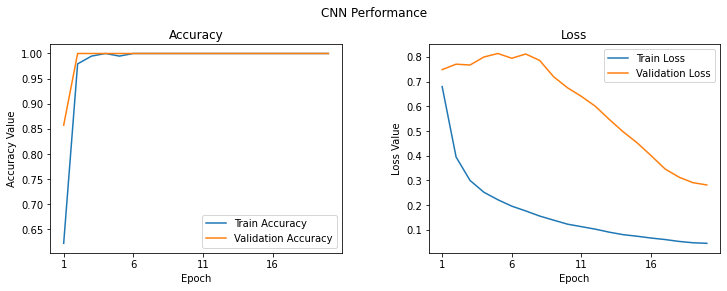

In [ ]:
#Accuracy and loss curves for model_1
print("#Accuracy and loss curves for model_1")
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
#evaluate data with test set
a= model.evaluate(np.array(X_test), np.array(y_test))[1]*100
print("The test Accuracy of model is: {:.2f}%".format(a))

2/2 [==============================] - 3s 1s/step - loss: 0.3419 - accuracy: 1.0000
The test Accuracy of model is: 100.00%


In [ ]:
#wrapper function for currency classification
def make_prediction(path):
  img= cv2.imread(path, 1)
  img= cv2.resize(img, dsize=(128, 128), interpolation= cv2.INTER_LINEAR)
  img= img/255
  shape= (1, 128, 128, 3)
  arr= np.zeros(shape)
  arr[0]= img
  pred= model.predict(arr)
  prediction= pred.argmax(axis=1)[0]

  return prediction

In [ ]:
path= "/content/drive/MyDrive/Ogunleye Project/DATASET/Nigerian Currency dataset/ADEKCURR-DB/500 naira/500-front-5.jpg"
print(make_prediction(path))

6
